In [52]:
import pandas as pd

In [53]:
df = pd.read_csv('times.txt')
df

,node,cpu,file,iter,time
0,6,4,1gb.txt,1,140442.0
1,6,4,1gb.txt,2,134061.0
2,6,4,1gb.txt,3,151772.0
3,6,4,1gb.txt,4,152239.0
4,6,4,1gb.txt,5,156110.0
...,...,...,...,...,...
85,1,1,5gb.txt,6,204388.0
86,1,1,5gb.txt,7,205797.0
87,1,1,5gb.txt,8,207441.0
88,1,1,5gb.txt,9,206568.0


In [54]:
groupped = df.drop(columns=['iter']).groupby(['node', 'cpu', 'file'])

In [55]:
mean = groupped.mean()
mean

time
node cpu file              
1    1   10gb.txt  432652.7
         1gb.txt    42077.2
         5gb.txt   205388.2
6    4   10gb.txt  540775.3
         1gb.txt   142447.0
         5gb.txt   140488.6
12   2   10gb.txt  574458.0
         1gb.txt   140938.5
         5gb.txt   136968.7

In [56]:
std = groupped.std()
std

time
node cpu file                  
1    1   10gb.txt   3210.747855
         1gb.txt    2255.874346
         5gb.txt    1363.782306
6    4   10gb.txt  34049.991206
         1gb.txt    8007.697616
         5gb.txt   10300.630220
12   2   10gb.txt  27784.359368
         1gb.txt    4087.161804
         5gb.txt    2959.546964

In [57]:
plot_params = {
    'figsize': (15,10),
}

<AxesSubplot:title={'center':'Time (s): Standard deviation'}, xlabel='node,cpu'>

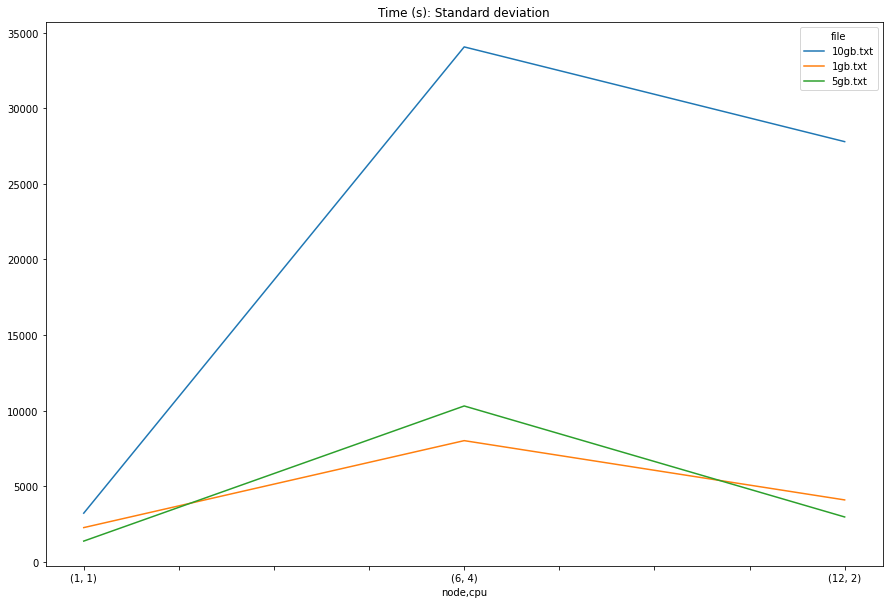

In [58]:
title = 'Time (s): Standard deviation'
std.reset_index().pivot(values='time', columns='file', index=['node', 'cpu']).plot(**plot_params, title=title)

In [59]:
mean.reset_index().columns

Index(['node', 'cpu', 'file', 'time'], dtype='object')

In [65]:
pivoted = mean.reset_index().pivot(values='time', columns='file', index=['node', 'cpu'])
pivoted

,file,10gb.txt,1gb.txt,5gb.txt
node,cpu,,,
1,1,432652.7,42077.2,205388.2
6,4,540775.3,142447.0,140488.6
12,2,574458.0,140938.5,136968.7


<AxesSubplot:title={'center':'Time (s): Mean'}, xlabel='node,cpu'>

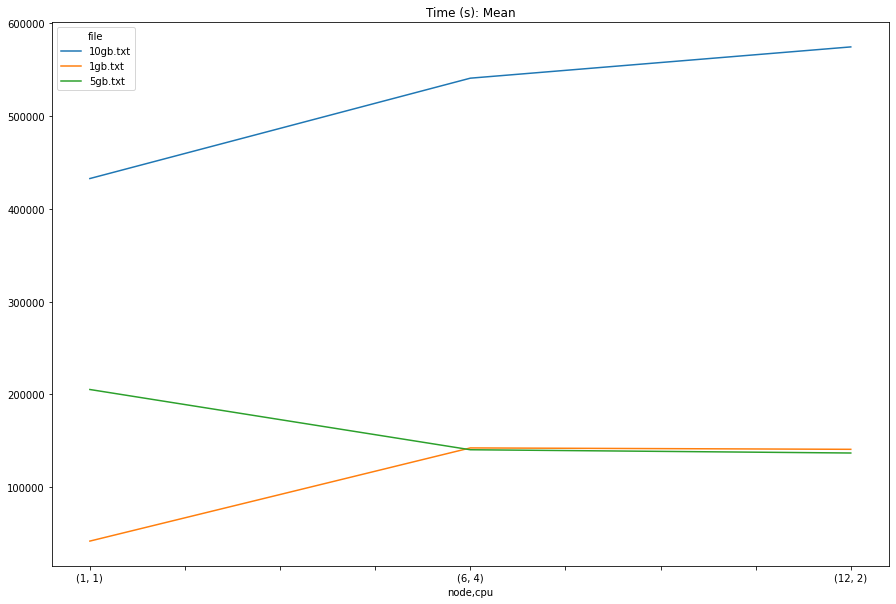

In [61]:
title = 'Time (s): Mean'
pivoted.plot(**plot_params, title=title)

In [68]:
sdf = pivoted.apply(lambda x: 1/x).mul(pivoted.iloc[(0)])
sdf

,file,10gb.txt,1gb.txt,5gb.txt
node,cpu,,,
1,1,1.000000,1.000000,1.000000
6,4,0.800060,0.295388,1.461956
12,2,0.753149,0.298550,1.499527


<AxesSubplot:title={'center':'Speedup'}, xlabel='node,cpu'>

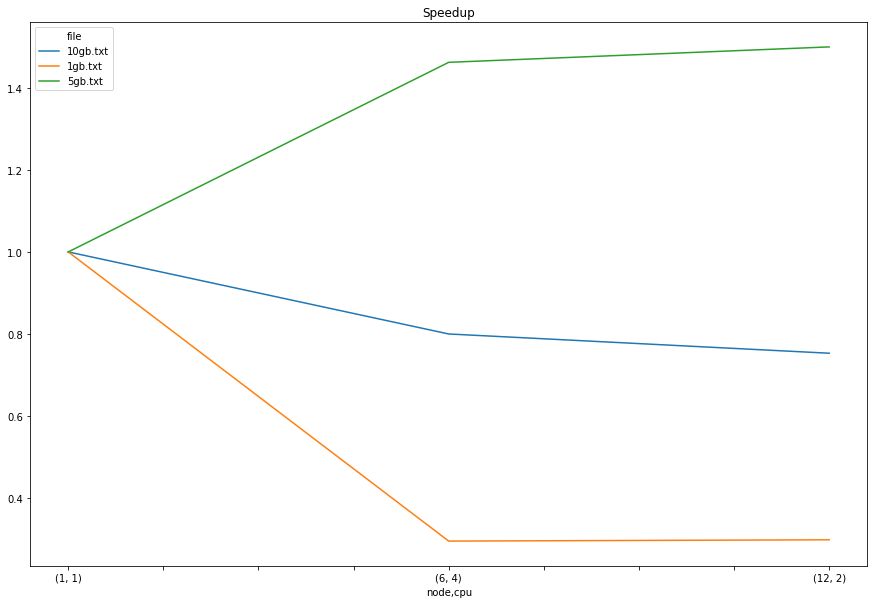

In [70]:
title = 'Speedup'
sdf.plot(**plot_params, title=title)